# **Implement a deep learning classifier using Keras and TensorFlow to detect phishing websites from URL-based features.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phishing_dataset.zip to phishing_dataset.zip


In [ ]:
import zipfile
with zipfile.ZipFile("phishing_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("phishing_dataset")

In [ ]:
# Import necessary libraries
import pandas as pd                          # For loading CSV files and handling data
from sklearn.model_selection import train_test_split  # For splitting data into training/testing sets
from sklearn.preprocessing import StandardScaler      # For feature normalization
from tensorflow.keras.models import Sequential        # For building the neural network
from tensorflow.keras.layers import Dense, Dropout    # Layers in the network

In [ ]:
# Step 1: Load the dataset
features = pd.read_csv("phishing_dataset/phishing_features.csv")   # Load input features from CSV
labels = pd.read_csv("phishing_dataset/phishing_labels.csv")       # Load target labels from CSV

In [ ]:
print(features.head())
print(labels.head())


   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           0                   1                 1   
2                  1           1                   1                 1   
3                 -1           1                   0                -1   
4                 -1           0                   0                -1   

   double_slash_redirecting  Prefix_Suffix  SSLfinal_State  web_traffic  \
0                        -1              1               1            1   
1                        -1             -1              -1            0   
2                         1              1               0            1   
3                        -1              1               1            1   
4                         1             -1              -1            0   

   Links_pointing_to_page  
0                       0  
1                       1  
2                   

In [ ]:
# Step 2: Convert labels from -1/1 to 0/1 (required for binary classification)
labels = labels.replace(-1, 0)   # Replace -1 with 0 (now: 0 = legitimate, 1 = phishing)

In [ ]:
# Step 3: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

In [ ]:
# Step 4: Normalize features (mean = 0, std = 1) for better training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit on training data and transform
X_test = scaler.transform(X_test)         # Use the same transformation on test data

In [ ]:
# Step 5: Build the deep learning model (Sequential = layer by layer)
model = Sequential()

# Input layer + First hidden layer: 64 neurons, ReLU activation
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout to prevent overfitting (30% neurons turned off randomly during training)
model.add(Dropout(0.3))

# Second hidden layer: 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Dropout again
model.add(Dropout(0.3))

# Output layer: 1 neuron with sigmoid (since it's binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the model
# Optimizer = Adam, Loss = binary crossentropy, Metrics = accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Print the model summary (shows layers, params, shapes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [ ]:
# Step 8: Train the model on training data
history = model.fit(
    X_train, y_train, epochs=20, batch_size=16, validation_split=0.2
)
# Trains for 20 epochs with 16 samples per batch, using 20% of training data for validation

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.9071 - val_accuracy: 0.0000e+00 - val_loss: 0.7341
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.3333 - loss: 0.9641 - val_accuracy: 0.0000e+00 - val_loss: 0.7430
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3333 - loss: 0.8937 - val_accuracy: 0.0000e+00 - val_loss: 0.7536
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.6667 - loss: 0.8213 - val_accuracy: 0.0000e+00 - val_loss: 0.7635
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.3333 - loss: 0.7433 - val_accuracy: 0.0000e+00 - val_loss: 0.7735
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3333 - loss: 0.8249 - val_accuracy: 0.0000e+00 - val_loss: 0.7830
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.4990 - val_accuracy: 0.0000e+00 - val_loss: 0.7920
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3333 - loss: 0.9097 - val

In [ ]:
# Step 9: Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.5269
Test Accuracy: 1.0000


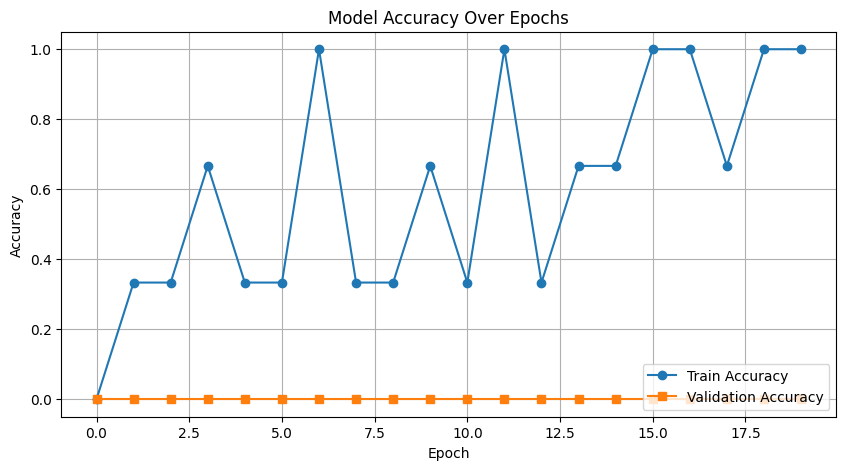

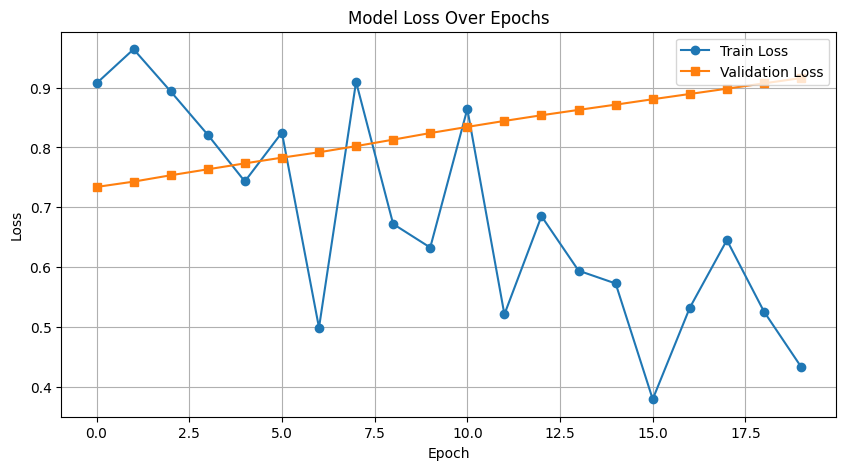

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()